In [180]:
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
# Set Default fig size
plt.rcParams['figure.figsize'] = [10, 6]

In [181]:
api = wandb.Api()
runs = api.runs("zeb/size-comparison")

data = []
for run in runs:
    config = run.config
    metrics = run.summary_metrics
    data.append({**config, **metrics})

df = pd.DataFrame(data)

In [182]:
print(df.num_params.unique())
print(df.num_train_examples.unique())

param_size_label_map = {
    436096 : "400K",
    634368 : "600K",
    832640 : "800K",
    1229184 : "1M",
    4817664 : "5M",
    19072512 : "19M",
    25377280 : "25M",
    85291776 : "85M",
}

df["num_params_label"] = df.num_params.map(param_size_label_map)

[19072512  1229184   832640 25377280  4817664 85291776   634368   436096]
[ 104923  293784   25327   10062  734458   50653 1468916]


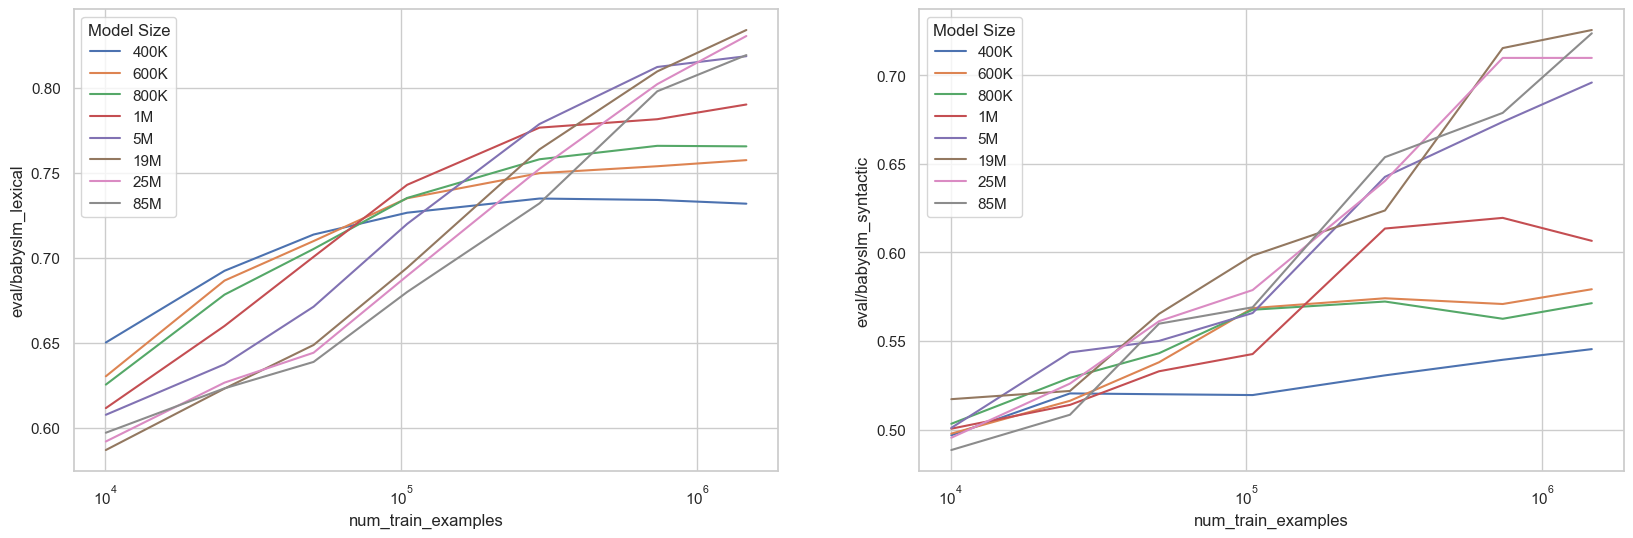

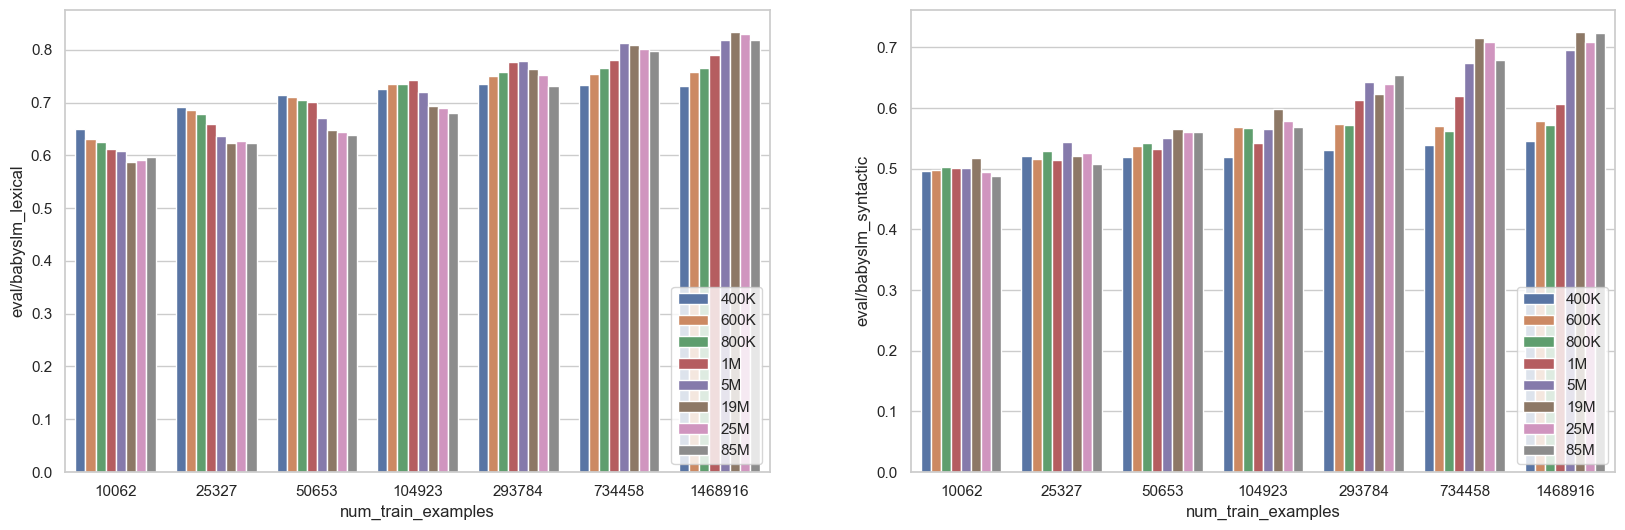

In [191]:
# df = df.sort_values(by='num_params')
# fig, axs = plt.subplots(1, 2, figsize=(20, 6))
# sns.barplot(x='num_train_examples', y='eval/babyslm_lexical', data=df, ax=axs[0])
# sns.barplot(x='num_train_examples', y='eval/babyslm_syntactic', data=df, ax=axs[1])
# plt.show()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(x='num_train_examples', y='eval/babyslm_lexical', data=df, hue='num_params_label', ax=axs[0])
sns.lineplot(x='num_train_examples', y='eval/babyslm_syntactic', data=df, hue='num_params_label', ax=axs[1])
axs[0].legend(title='Model Size')
axs[1].legend(title='Model Size')
axs[0].set_xscale('log')
axs[1].set_xscale('log')

plt.show()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(x='num_train_examples', y='eval/babyslm_lexical', data=df, hue='num_params_label', ax=axs[0])
sns.barplot(x='num_train_examples', y='eval/babyslm_syntactic', data=df, hue='num_params_label', ax=axs[1])
axs[0].legend(title='Model Size')
axs[1].legend(title='Model Size')
axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')
plt.show()


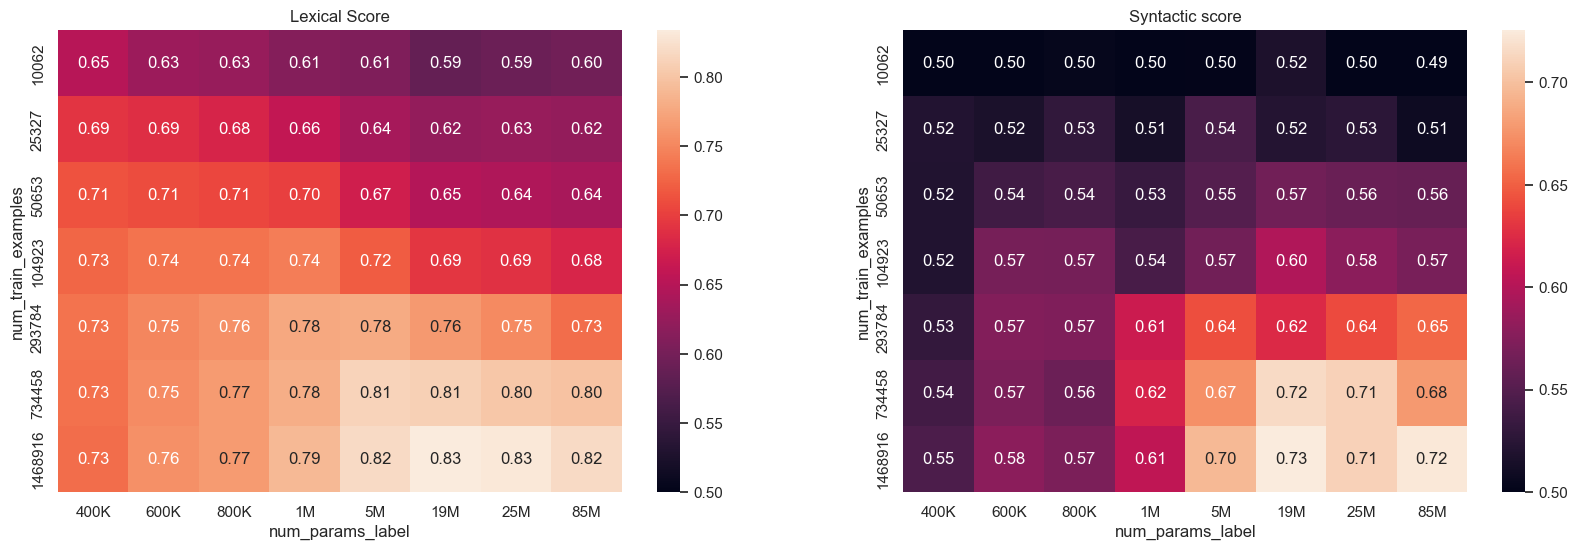

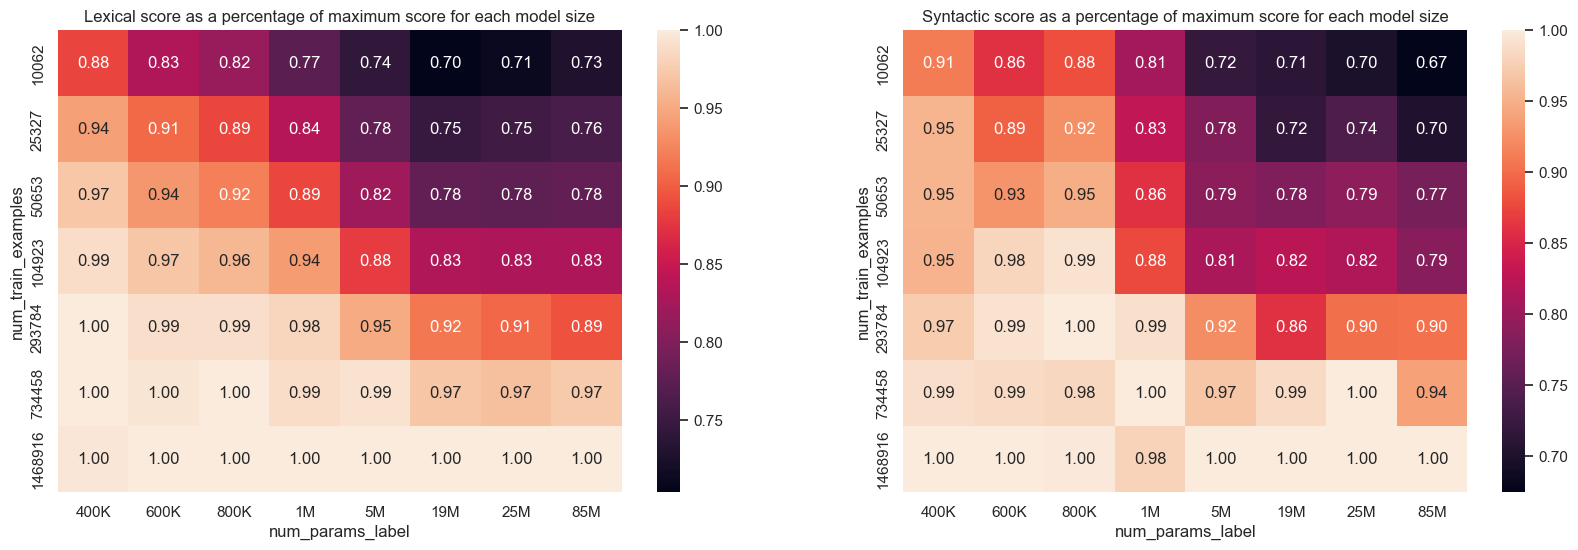

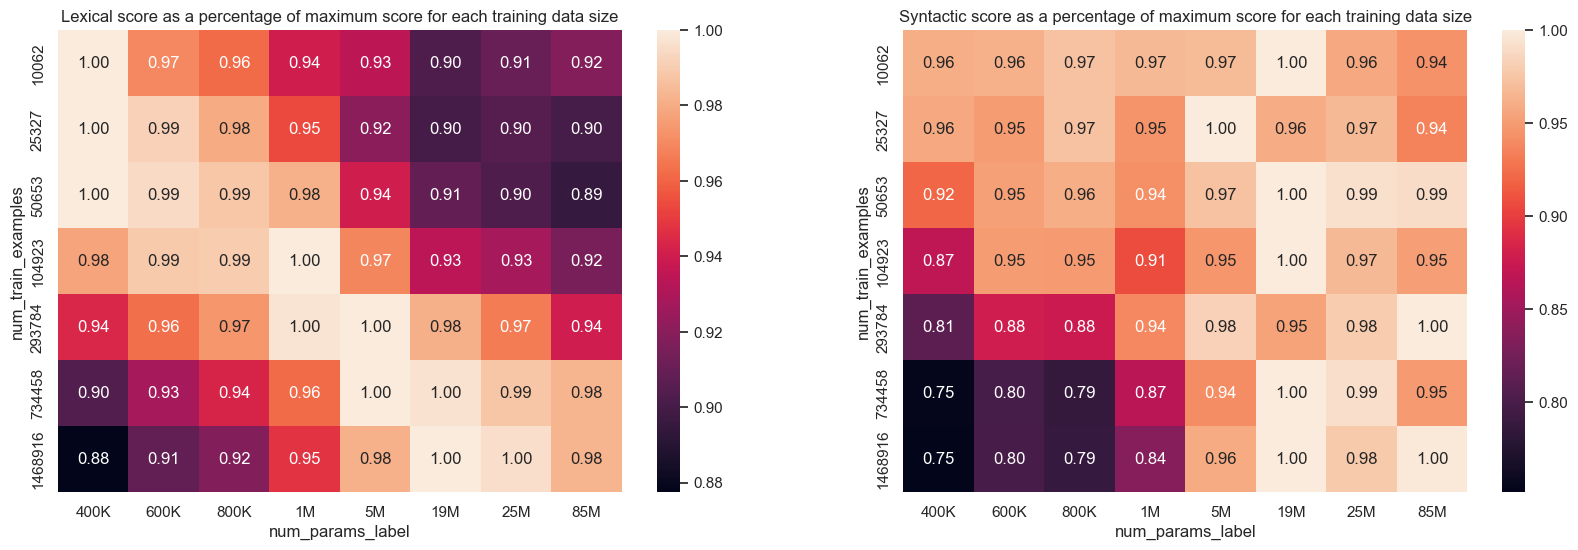

In [184]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
df = df.sort_values(by='num_train_examples')
df_plot = df.pivot(index='num_train_examples', columns='num_params_label', values='eval/babyslm_lexical')
df_plot = df_plot[param_size_label_map.values()]
sns.heatmap(df_plot, annot=True, fmt=".2f", ax=axs[0], vmin=0.5)
df_plot = df.pivot(index='num_train_examples', columns='num_params_label', values='eval/babyslm_syntactic')
df_plot = df_plot[param_size_label_map.values()]
sns.heatmap(df_plot, annot=True, fmt=".2f", ax=axs[1], vmin=0.5)
axs[0].set_title("Lexical Score")
axs[1].set_title("Syntactic score")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
df = df.sort_values(by='num_train_examples')
df_plot = df.pivot(index='num_train_examples', columns='num_params_label', values='eval/babyslm_lexical')
df_plot = df_plot[param_size_label_map.values()]
df_plot = df_plot.div(df_plot.max(axis=0), axis=1)
sns.heatmap(df_plot, annot=True, fmt=".2f", ax=axs[0])
df_plot = df.pivot(index='num_train_examples', columns='num_params_label', values='eval/babyslm_syntactic')
df_plot = df_plot[param_size_label_map.values()]
df_plot = df_plot.div(df_plot.max(axis=0), axis=1)
sns.heatmap(df_plot, annot=True, fmt=".2f", ax=axs[1])
axs[0].set_title("Lexical score as a percentage of maximum score for each model size")
axs[1].set_title("Syntactic score as a percentage of maximum score for each model size")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
df = df.sort_values(by='num_train_examples')
df_plot = df.pivot(index='num_train_examples', columns='num_params_label', values='eval/babyslm_lexical')
df_plot = df_plot[param_size_label_map.values()]
df_plot = df_plot.div(df_plot.max(axis=1), axis=0)
sns.heatmap(df_plot, annot=True, fmt=".2f", ax=axs[0])
df_plot = df.pivot(index='num_train_examples', columns='num_params_label', values='eval/babyslm_syntactic')
df_plot = df_plot[param_size_label_map.values()]
df_plot = df_plot.div(df_plot.max(axis=1), axis=0)
sns.heatmap(df_plot, annot=True, fmt=".2f", ax=axs[1])
axs[0].set_title("Lexical score as a percentage of maximum score for each training data size")
axs[1].set_title("Syntactic score as a percentage of maximum score for each training data size")
plt.show()


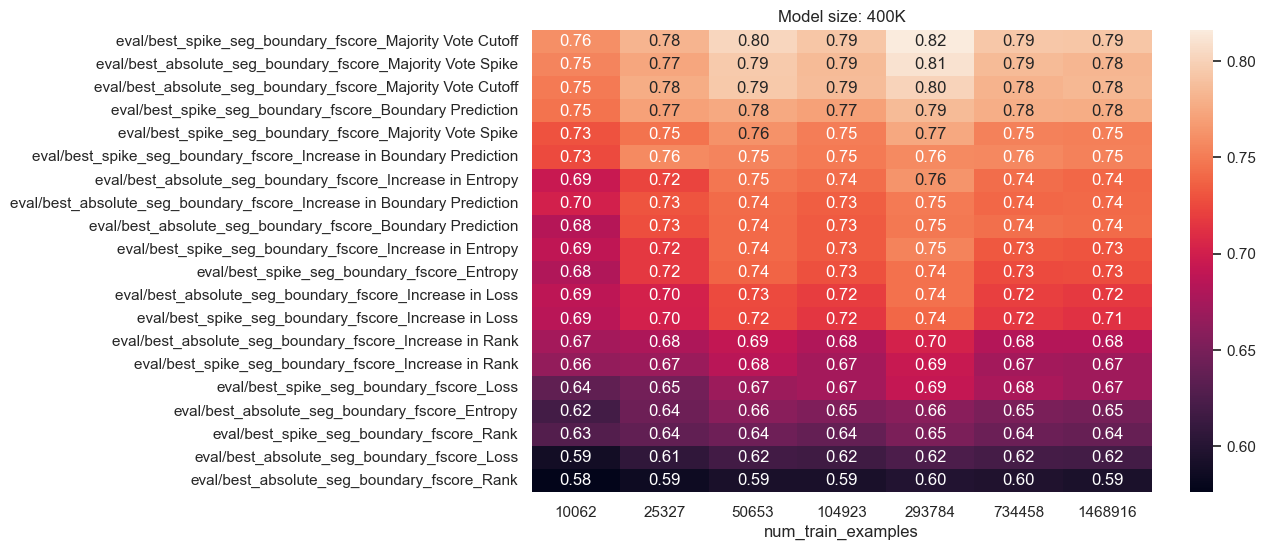

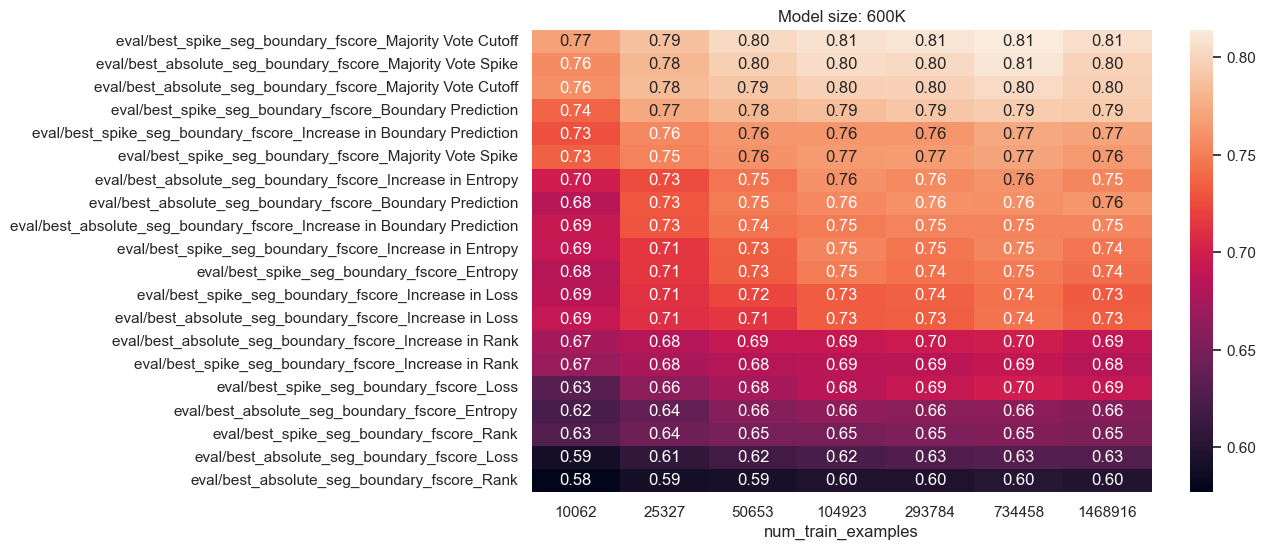

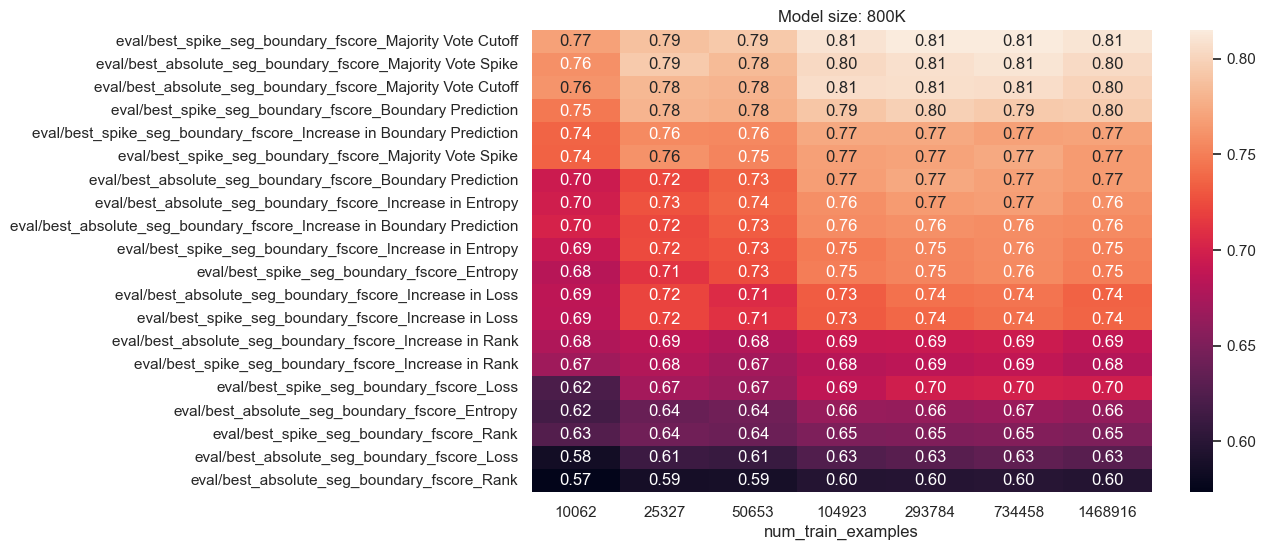

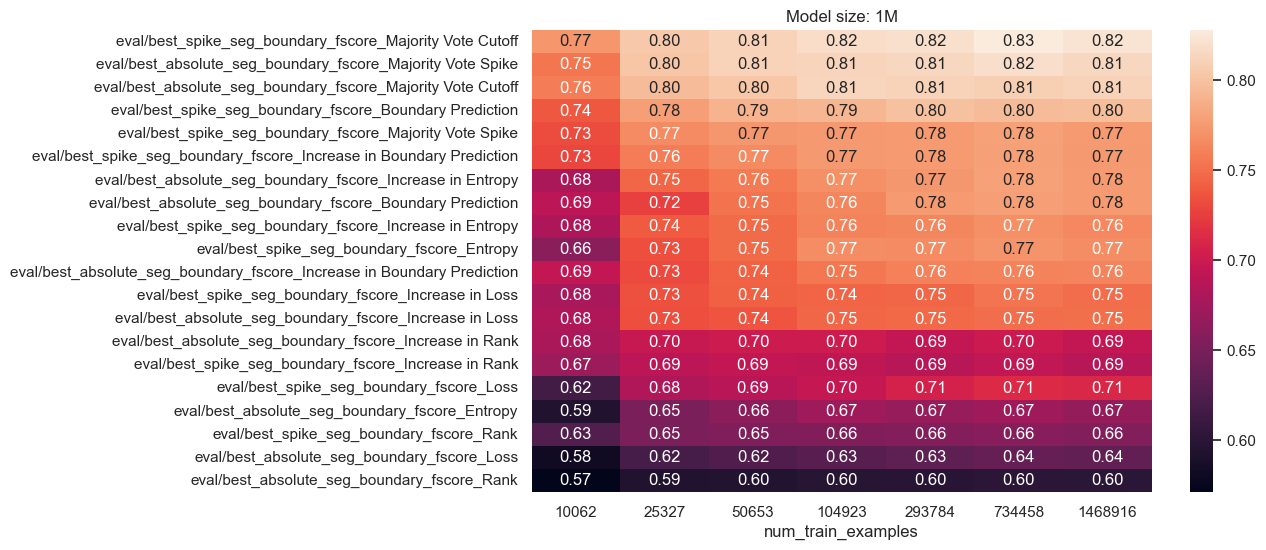

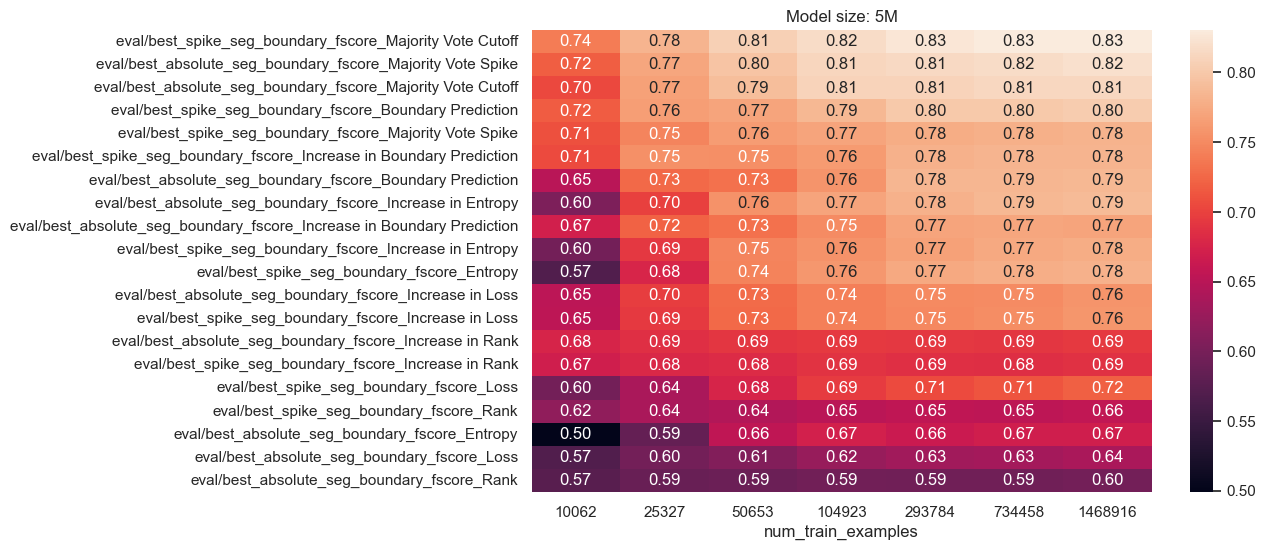

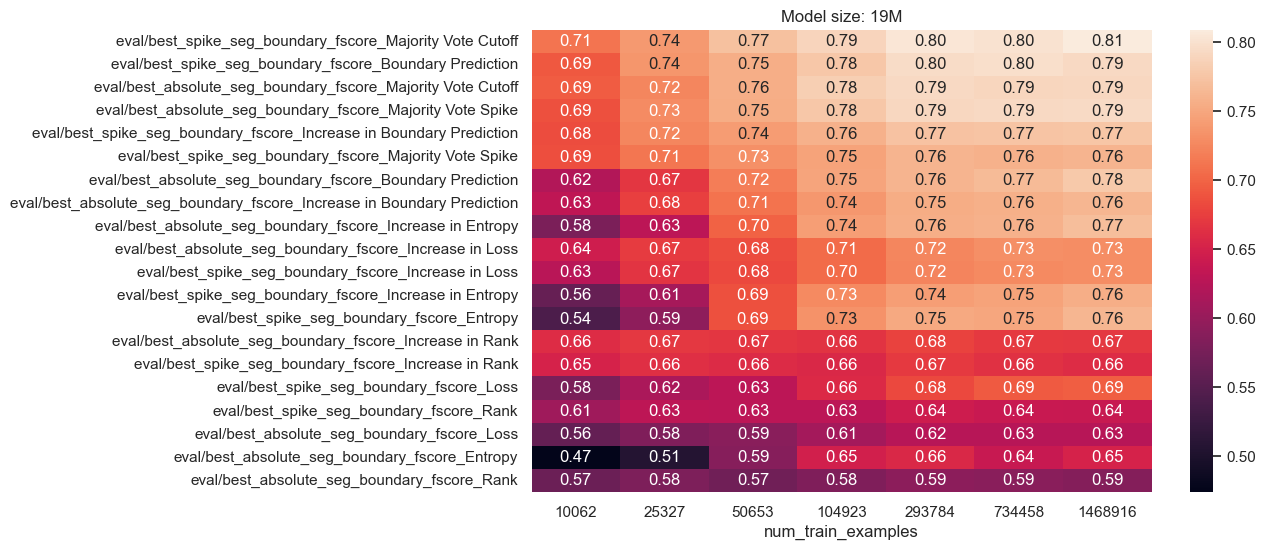

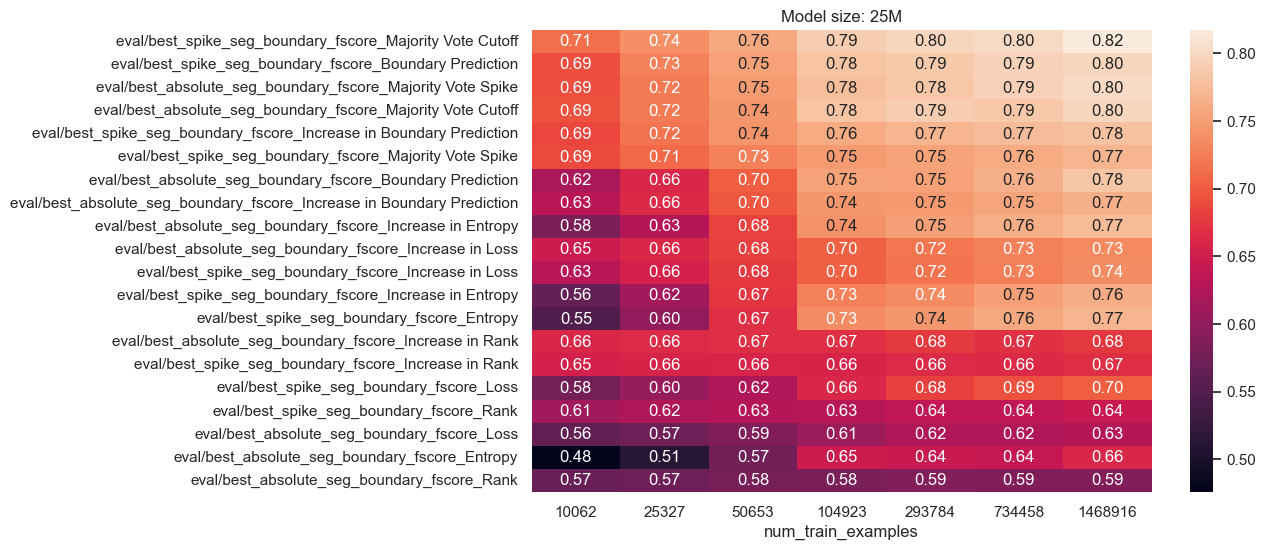

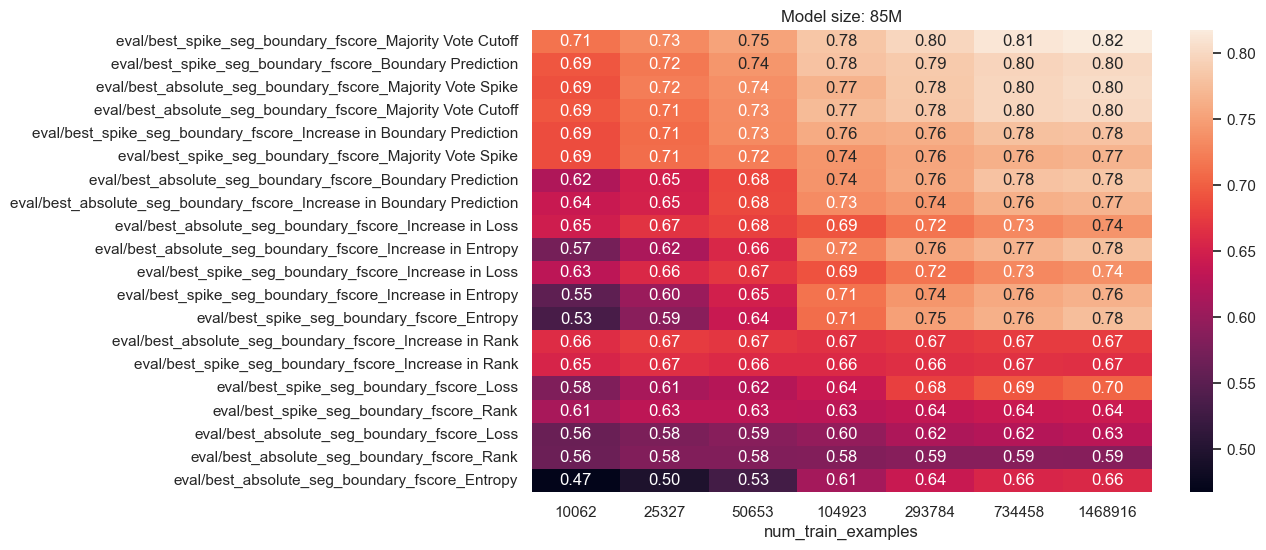

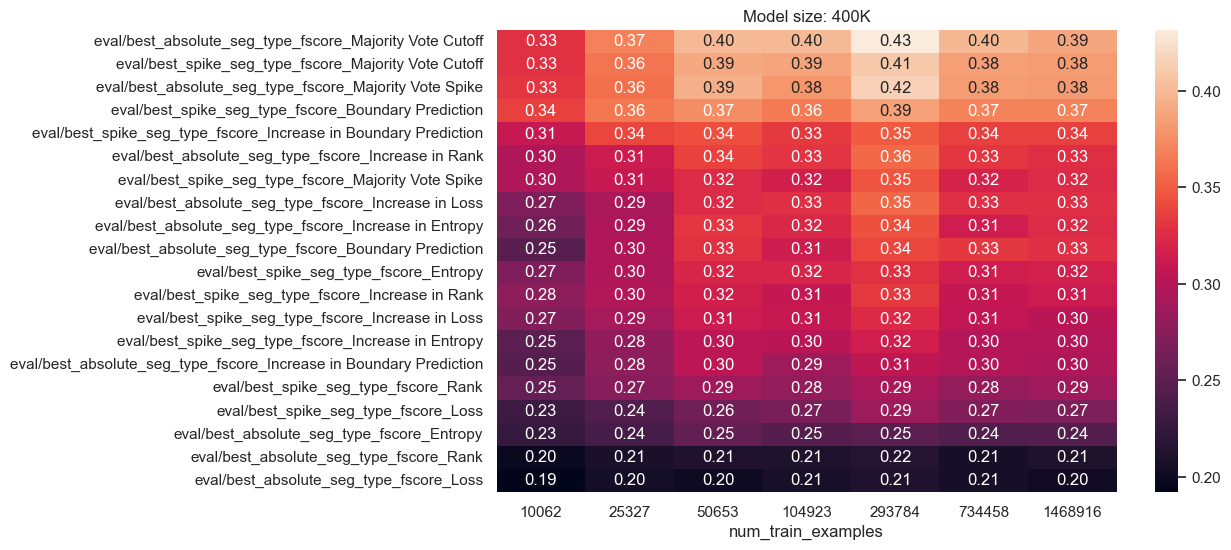

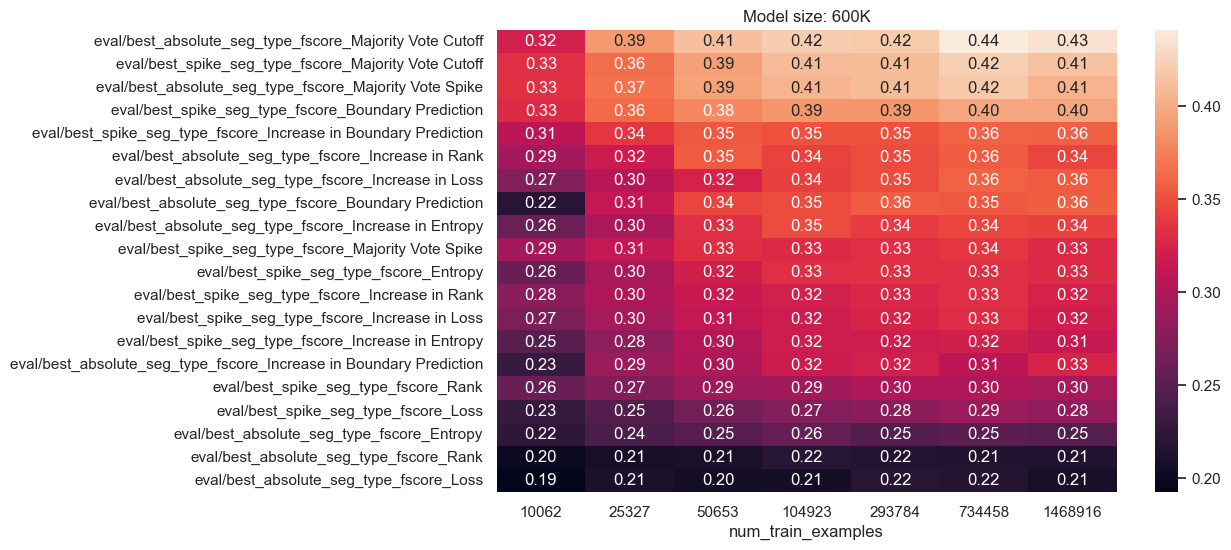

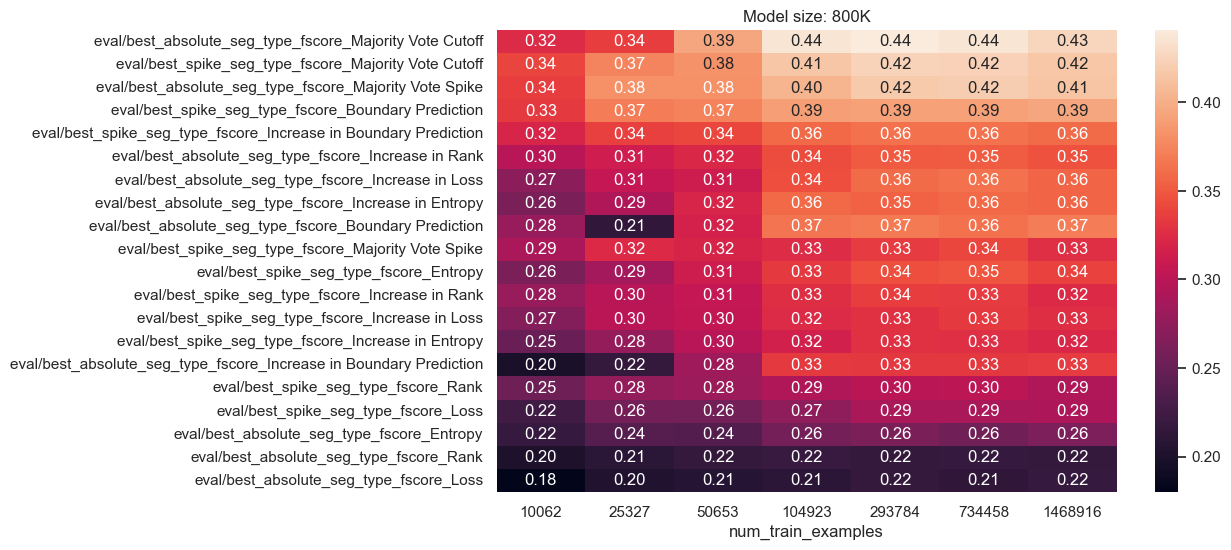

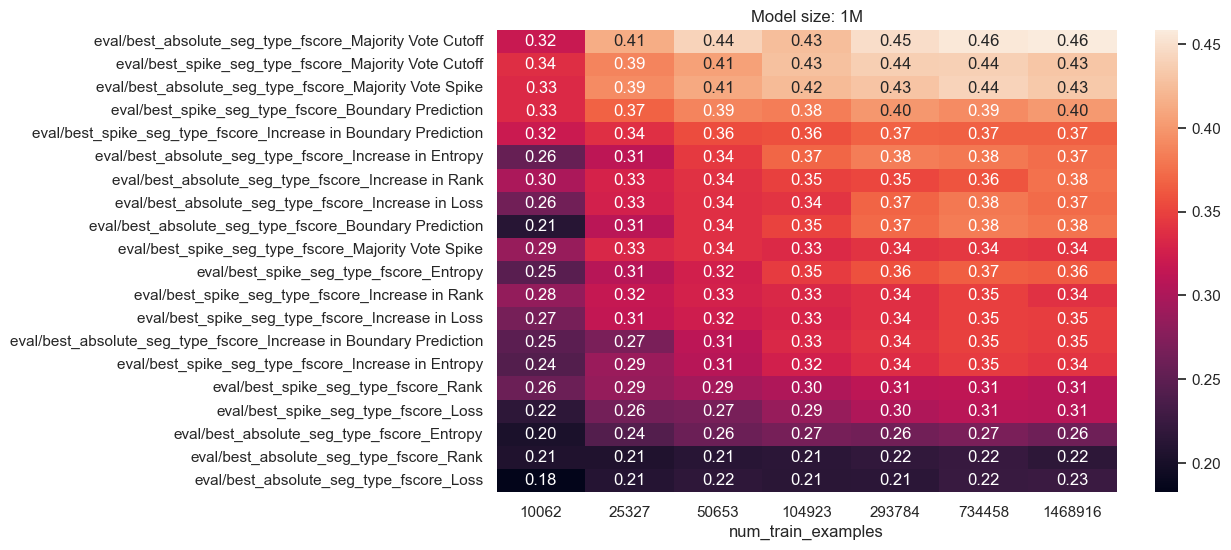

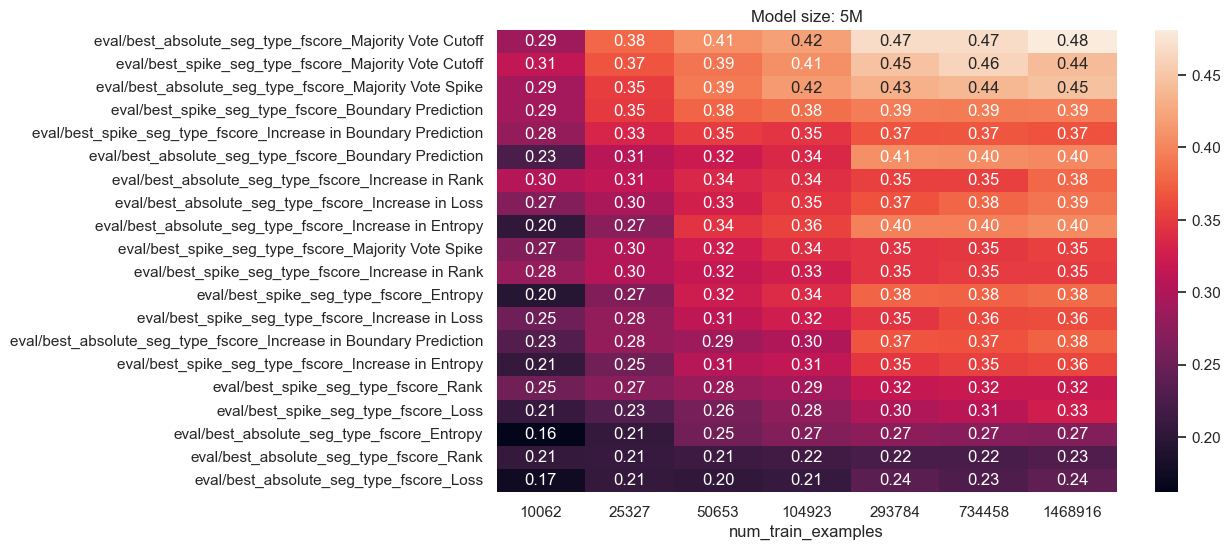

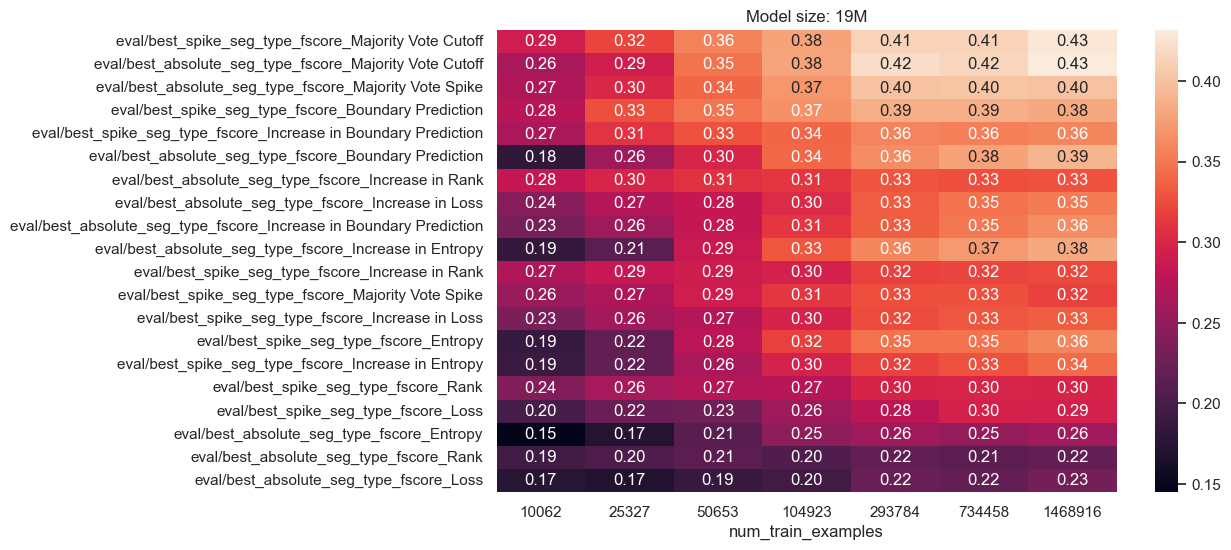

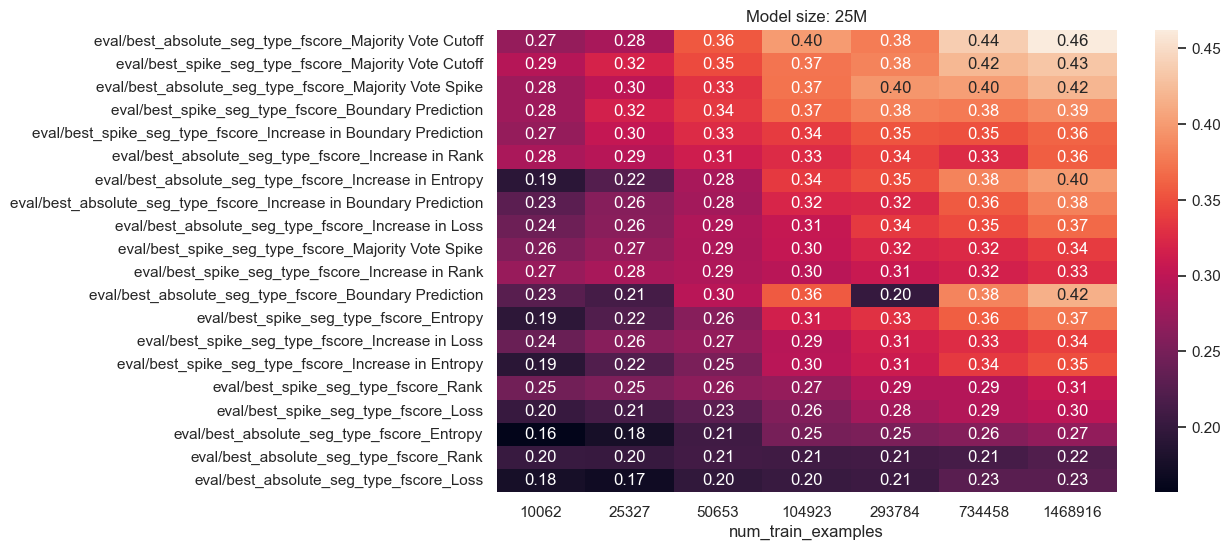

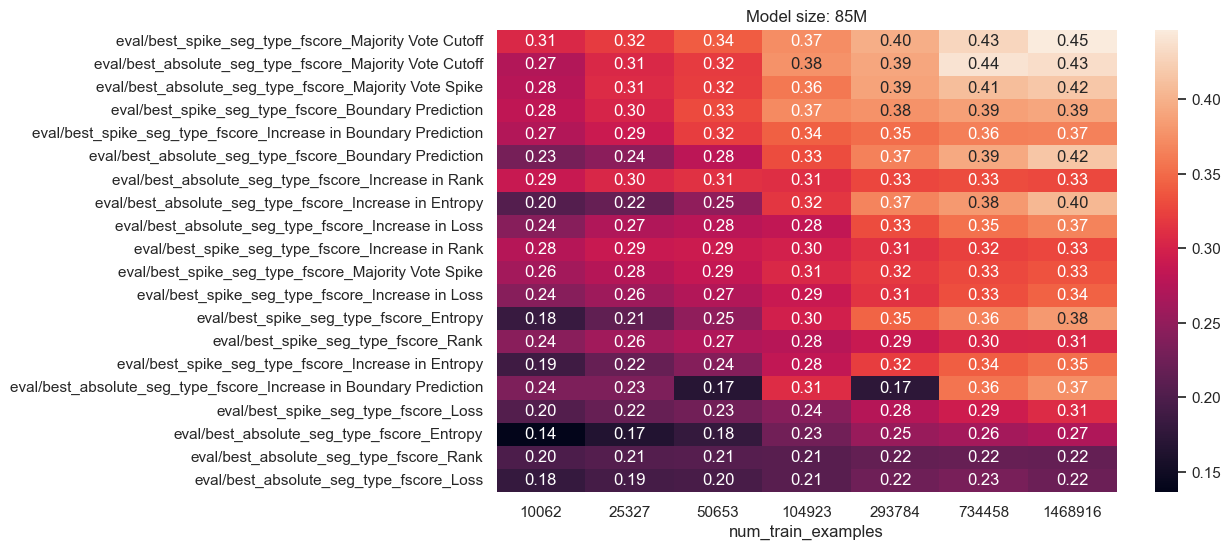

In [185]:
param_sizes = param_size_label_map.values()
for model_size in param_sizes:
    df_plot = df[df.num_params_label == model_size]
    df_plot = df_plot.sort_values(by='num_train_examples')
    seg_keys = [key for key in df.columns if 'boundary_fscore' in key and ('eval/best_absolute' in key or 'eval/best_spike' in key)] + ['num_train_examples']
    df_plot = df_plot[seg_keys]
    df_plot.index = df_plot.num_train_examples
    df_plot = df_plot.drop(columns='num_train_examples')
    df_plot = df_plot.T
    df_plot['mean'] = df_plot.mean(axis=1)
    df_plot = df_plot.sort_values(by='mean', axis=0, ascending=False)
    df_plot = df_plot.drop(columns='mean')
    sns.heatmap(df_plot, annot=True, fmt=".2f")
    plt.title(f"Model size: {model_size}")
    plt.show()

for model_size in param_sizes:
    df_plot = df[df.num_params_label == model_size]
    df_plot = df_plot.sort_values(by='num_train_examples')
    seg_keys = [key for key in df.columns if 'type_fscore' in key and ('eval/best_absolute' in key or 'eval/best_spike' in key)] + ['num_train_examples']
    df_plot = df_plot[seg_keys]
    df_plot.index = df_plot.num_train_examples
    df_plot = df_plot.drop(columns='num_train_examples')
    df_plot = df_plot.T
    df_plot['mean'] = df_plot.mean(axis=1)
    df_plot = df_plot.sort_values(by='mean', axis=0, ascending=False)
    df_plot = df_plot.drop(columns='mean')
    sns.heatmap(df_plot, annot=True, fmt=".2f")
    plt.title(f"Model size: {model_size}")
    plt.show()
    

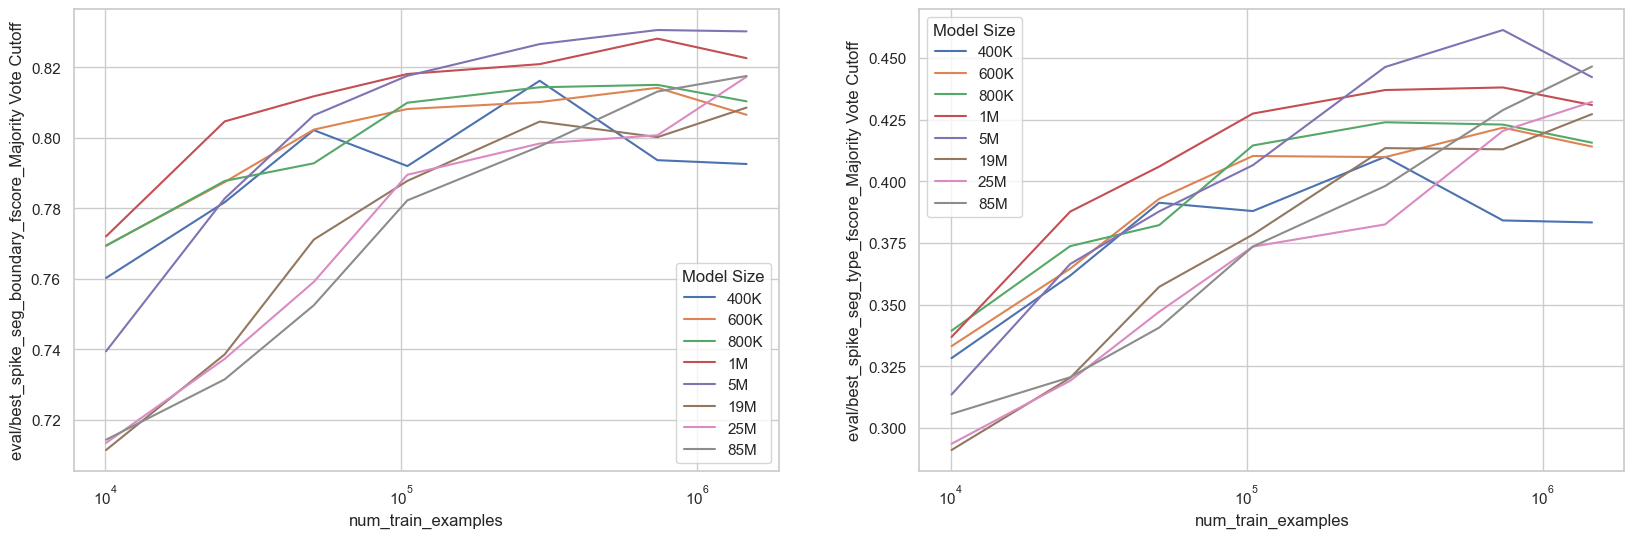

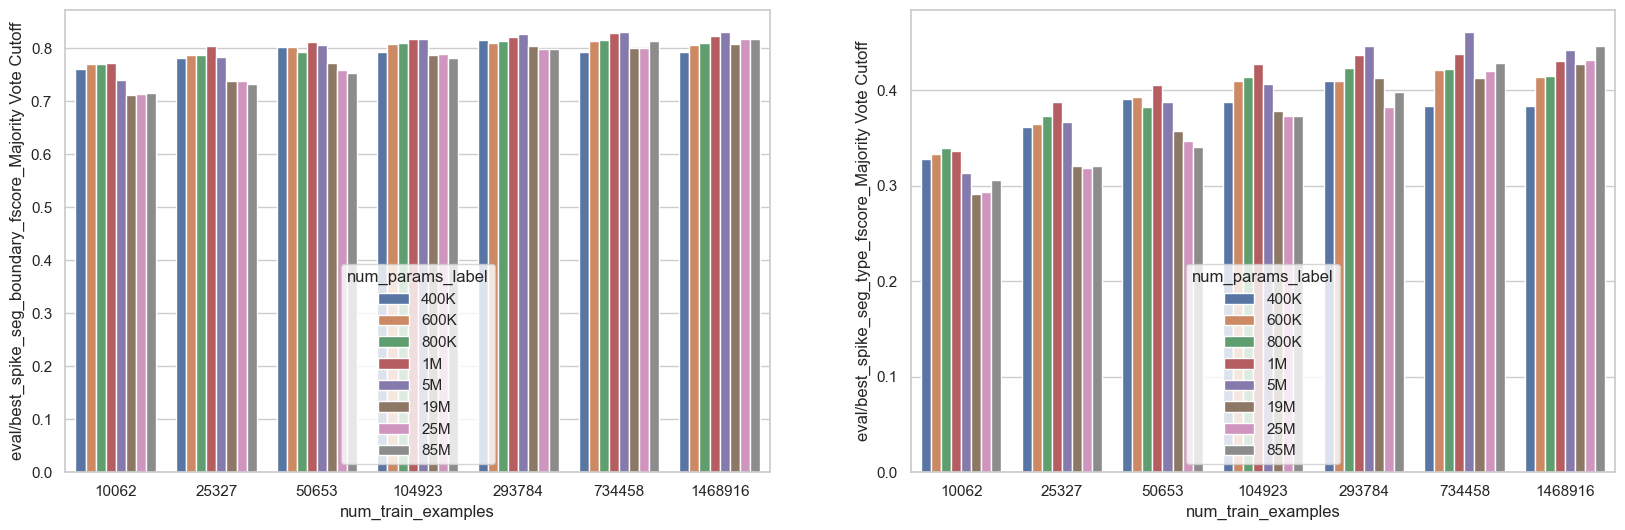

In [186]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
df = df.sort_values(by='num_params')
sns.lineplot(x='num_train_examples', y='eval/best_spike_seg_boundary_fscore_Majority Vote Cutoff', data=df, hue='num_params_label', ax=axs[0])
sns.lineplot(x='num_train_examples', y='eval/best_spike_seg_type_fscore_Majority Vote Cutoff', data=df, hue='num_params_label', ax=axs[1])
axs[0].legend(title='Model Size')
axs[1].legend(title='Model Size')
axs[0].set_xscale('log')
axs[1].set_xscale('log')

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(x='num_train_examples', y='eval/best_spike_seg_boundary_fscore_Majority Vote Cutoff', data=df, hue='num_params_label', ax=axs[0])
sns.barplot(x='num_train_examples', y='eval/best_spike_seg_type_fscore_Majority Vote Cutoff', data=df, hue='num_params_label', ax=axs[1])
plt.show()

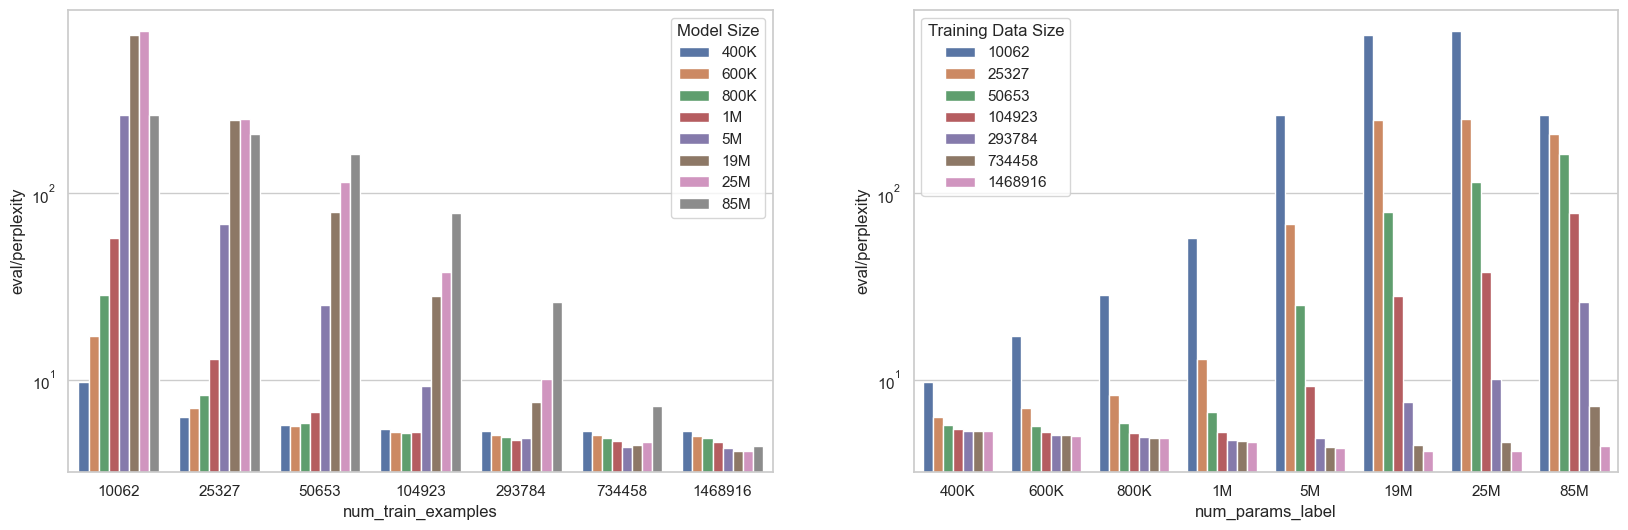

In [187]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
df = df.sort_values(by='num_params')
sns.barplot(x='num_train_examples', y='eval/perplexity', data=df, hue='num_params_label', ax=axs[0])
sns.barplot(x='num_params_label', y='eval/perplexity', data=df, hue='num_train_examples', ax=axs[1])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].legend(title='Model Size')
axs[1].legend(title='Training Data Size')

plt.show()

